AttributeError: module 'nest.voltage_trace' has no attribute 'width'

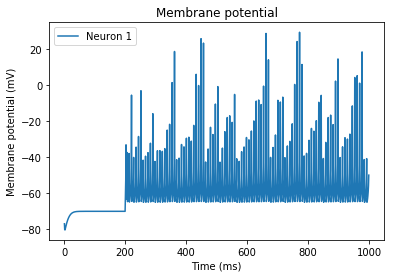

In [23]:
import nest
import nest.voltage_trace
nest.ResetKernel()

neuron = nest.Create('izhikevich')

nest.SetStatus(neuron, {"V_th": 30.0})
nest.SetStatus(neuron, {"consistent_integration": False})

# voltmeter = nest.Create('voltmeter')
# nest.Connect(voltmeter, neuron)

nest.SetStatus(neuron, {"a": 0.1})
nest.SetStatus(neuron, {"b": 0.2})
nest.SetStatus(neuron, {"c": -65.0})
nest.SetStatus(neuron, {"d": 2.0})

multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector",
                params={"withgid": True, "withtime": True})
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)



nest.Simulate(200.0)

nest.SetStatus(neuron, {"I_e": 10.0})

nest.Simulate(800.0)
nest.voltage_trace.from_device(multimeter)
nest.voltage_trace.width(10)
nest.voltage_trace.show()

print("a: " + str(nest.GetStatus(neuron, "a")[0]))
print("b: " + str(nest.GetStatus(neuron, "b")[0]))
print("c: " + str(nest.GetStatus(neuron, "c")[0]))
print("d: " + str(nest.GetStatus(neuron, "d")[0]))
print("V_th: " + str(nest.GetStatus(neuron, "V_th")[0]))
print("consistent_integration: " + str(nest.GetStatus(neuron, "consistent_integration")[0]))
print("V_m: " + str(nest.GetStatus(neuron, "V_m")[0]))

# a = 0.02
# b = 0.2
# c = -50
# d = 2
